# diabetes detection project
- diabetes dataset
- svm classifier

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

# Analyse des donnees

## Chargement des donnes

In [48]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Quelle est la répartition des patients diabétiques et non diabétiques dans l'ensemble de données ?

In [49]:
# Comptez le nombre de patients diabétiques (1) et non diabétiques (0)
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Quels sont les niveaux moyens de glucose (glycémie) pour les patients diabétiques et non diabétiques ?

In [50]:
# Calcul de la moyenne de glucose pour les patients diabétiques et non diabétiques
mean_glucose_diabetic = data[data['Outcome'] == 1]['Glucose'].mean()
mean_glucose_non_diabetic = data[data['Outcome'] == 0]['Glucose'].mean()
print("Moyenne de glucose pour les diabétiques :", mean_glucose_diabetic)
print("Moyenne de glucose pour les non-diabétiques :", mean_glucose_non_diabetic)
(mean_glucose_diabetic+mean_glucose_non_diabetic)/2

Moyenne de glucose pour les diabétiques : 141.25746268656715
Moyenne de glucose pour les non-diabétiques : 109.98


125.61873134328357

## Existe-t-il une corrélation entre l'âge et le diabète ?

In [52]:
# Calcul de la corrélation entre l'âge et le diabète
correlation_age_diabetes = data['Age'].corr(data['Outcome'])
print("Corrélation entre l'âge et le diabète :", correlation_age_diabetes)# je peux eventuellement poser la question pour toute autre caracteristique

Corrélation entre l'âge et le diabète : 0.23835598302719757


## Quelle est la distribution de l'indice de masse corporelle (IMC) pour les patients diabétiques et non diabétiques ?

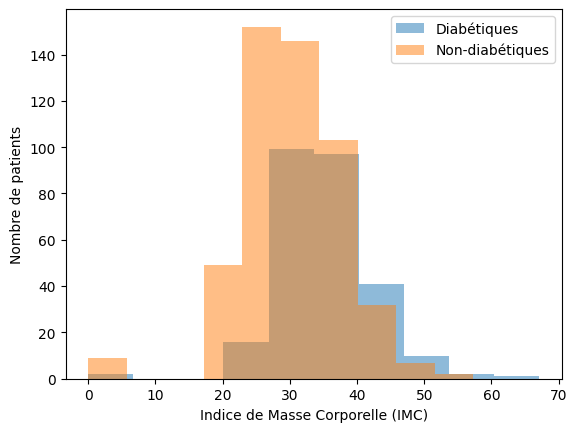

In [53]:
# Créez des graphiques de distribution de l'IMC pour les deux groupes
import matplotlib.pyplot as plt

data[data['Outcome'] == 1]['BMI'].plot(kind='hist', alpha=0.5, label='Diabétiques')
data[data['Outcome'] == 0]['BMI'].plot(kind='hist', alpha=0.5, label='Non-diabétiques')
plt.legend()
plt.xlabel('Indice de Masse Corporelle (IMC)')
plt.ylabel('Nombre de patients')
plt.show()

## Quelle est la répartition des niveaux de pression artérielle systolique et diastolique pour les patients diabétiques et non diabétiques ?

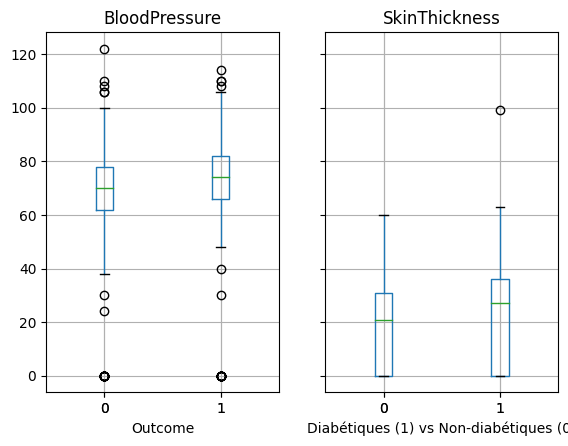

In [55]:
# Créez des boîtes à moustaches (box plots) pour la pression artérielle systolique et diastolique
data.boxplot(column=['BloodPressure', 'SkinThickness'], by='Outcome')
plt.suptitle('')
plt.xlabel('Diabétiques (1) vs Non-diabétiques (0)')
plt.show()


## Existe-t-il une différence significative dans les niveaux d'insuline entre les patients diabétiques et non diabétiques ?

In [56]:
# Effectuez un test t de Student pour comparer les niveaux d'insuline
from scipy.stats import ttest_ind

cholesterol_diabetic = data[data['Outcome'] == 1]['Insulin']
cholesterol_non_diabetic = data[data['Outcome'] == 0]['Insulin']

t_stat, p_value = ttest_ind(cholesterol_diabetic, cholesterol_non_diabetic)
print("Statistique de test t :", t_stat)
print("Valeur de p :", p_value)


Statistique de test t : 3.64432538765356
Valeur de p : 0.00028618646036031987


In [ ]:
Determiner comment interpreter un box plots
comment interpreter un test t de Student 
comment interpreter le resultats d'une correlation

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64

# Preprocessing

reduire le nombre de label 0 au meme nombre que le label 1

In [39]:
data_minoritaire = data[data['Outcome']==1]#extraire les donnees de label 1
data_majoritaire = data[data['Outcome']==0]#extraire les donnees de label 0
data_majoritaire = data_majoritaire.sample(n=len(data_minoritaire))#reduire le nombre de ligne par rapport au nombre d'elements du label1

In [40]:
data_concat = pd.concat([data_minoritaire,data_majoritaire])#concatenation des deux dataframes label 1 et 0 
data_concat = data_concat.sample(frac=1)#melanger aleatoirement les donnees
data_concat['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [42]:
data_concat.sort_values(by='Outcome')#trier les donnees par rapport a une colonne

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
670,6,165,68,26,168,33.6,0.631,49,0
454,2,100,54,28,105,37.8,0.498,24,0
351,4,137,84,0,0,31.2,0.252,30,0
18,1,103,30,38,83,43.3,0.183,33,0
118,4,97,60,23,0,28.2,0.443,22,0
...,...,...,...,...,...,...,...,...,...
394,4,158,78,0,0,32.9,0.803,31,1
598,1,173,74,0,0,36.8,0.088,38,1
132,3,170,64,37,225,34.5,0.356,30,1
560,6,125,76,0,0,33.8,0.121,54,1


## 0 est le label des personnes non diabetiques
## 1 est le label des personnes diabetiques

In [6]:
features = data.drop(columns='Outcome',axis=1) # suppression de la colonne Outcome des autres colonne
label = data['Outcome'] # selection de la colonne Outcome parmis les autres colonne

In [7]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
label

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Standardisation des donnees

In [9]:
# Créez une instance de StandardScaler
scaler = StandardScaler()

# Ajustez le scaler aux données
scaler.fit(features)

StandardScaler()

In [10]:
# Transformez les données en utilisant le scaler
features_scaled = scaler.transform(features)

In [11]:
features_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
features = features_scaled

In [13]:
features

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Division des donnees en donnees d'entrainement et donnees test

In [14]:
# Divisez vos données en ensembles d'entraînement et de test
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2)

In [15]:
features_train.shape

(614, 8)

In [16]:
features_test.shape

(154, 8)

# Entrainement du model

In [17]:
classifier = svm.SVC(kernel='linear')
classifier.fit(features_train,label_train)

SVC(kernel='linear')

# Evaluation du model

## precision avec les donnees d'entrainement 

In [18]:
label_train_prediction = classifier.predict(features_train)
accuracy_score(label_train_prediction,label_train)

0.7752442996742671

## precision avec les donnees tests

In [29]:
label_test_prediction = classifier.predict(features_test)
accuracy = accuracy_score(label_test_prediction,label_test)
accuracy

0.8116883116883117

## Matrice de confusion

```
               Prédiction 0     Prédiction 1
Valeur réelle 0     Vrai Négatif    Faux Positif
Valeur réelle 1     Faux Négatif    Vrai Positif
```

In [27]:
cm = confusion_matrix(label_test_prediction,label_test)
cm

array([[93, 18],
       [11, 32]])

 ### Rappel (ou sensibilité) 
 Il mesure la proportion des cas positifs réels qui sont correctement identifiés par le modèle et se calcule par TP / (TP + FN).
 Un rappel élevé indique que le modèle a moins de faux négatifs.

In [28]:
rappel = 32/(32+11)
rappel

0.7441860465116279

### F-mesure
C'est une mesure qui combine à la fois la précision et le rappel en une seule valeur et permet d'évaluer l'équilibre entre les deux. Elle se calcule généralement comme 2 * (précision * rappel) / (précision + rappel).

In [30]:
f_mesure = 2*(accuracy*rappel)/(accuracy+rappel)
f_mesure

0.7764728719790353

# Test du model en production

Le model a deja ete entraine et teste. il est possible d'utiliser des techniques d'optimisation pour augmenter la precision actuelle. Pour l'instant nous allons supposer que en production le systeme recoit la donnes suivante et voyons comment il reagit

In [20]:
input_sample = (5,166,72,19,175,22.7,0.6,51)
input_sample_1 = (6,148,72,35,0,33.6,0.627,50)
input_sample_0 = (1,85,66,29,0,175.6,0.351,31)
input_np_array = np.asarray(input_sample_0)
input_np_array_reshape = input_np_array.reshape(1,-1)

In [21]:
input_np_array

array([  1.   ,  85.   ,  66.   ,  29.   ,   0.   , 175.6  ,   0.351,
        31.   ])

In [22]:
input_np_array_reshape.shape

(1, 8)

In [23]:
std_data = scaler.transform(input_np_array_reshape)
std_data

/home/benjojo/.local/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        18.22654561, -0.36506078, -0.19067191]])

In [24]:
prediction = classifier.predict(std_data)
prediction

array([1])

In [25]:
if(prediction[0]==0):
    print("the person is not diabetic")
else :
    print("the person is diabetic")

the person is diabetic
